In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [20]:
def vary_threads(executable_file):
    li = []
    mean_li = []
    M = 40
    muw = 0.5
    mus = 0.5
    k = 5
    for nw in [4, 8, 16, 32]:
        ns = int(nw / 4)
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"{nw} {ns} {M} {muw} {mus} {k}")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = [float(x) for x in f1.readline().split()]
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # Take mean of five executions
        mean_li_temp = np.mean(li_temp, axis=0)
        mean_li.append(mean_li_temp)
        # print(li)
    return np.array(li), np.array(mean_li)

In [21]:
# subprocess.call(f"./OBS inp-params.txt > 1.txt", shell=True)
# f1 = open("1.txt", "r")

# f1.close()

In [22]:
# print(a)
# print(type(a[0]))

In [23]:
obs_vary_threads, obs_mean_vary_threads = vary_threads("OBS")

In [24]:
wfs_vary_threads, wfs_mean_vary_threads = vary_threads("WFS")

In [26]:
wfs_mean_vary_threads

array([[ 27303.74,  12136.04,  23988.32, 174035.2 ,  40279.8 , 174035.2 ],
       [ 39950.4 ,  41590.44,  40140.94, 563937.2 , 241845.6 , 563937.2 ],
       [ 39846.  ,  74943.32,  43276.84, 658778.2 , 475061.6 , 797335.4 ],
       [ 22991.74,  38948.5 ,  24512.2 , 503240.4 , 293513.6 , 528150.4 ]])

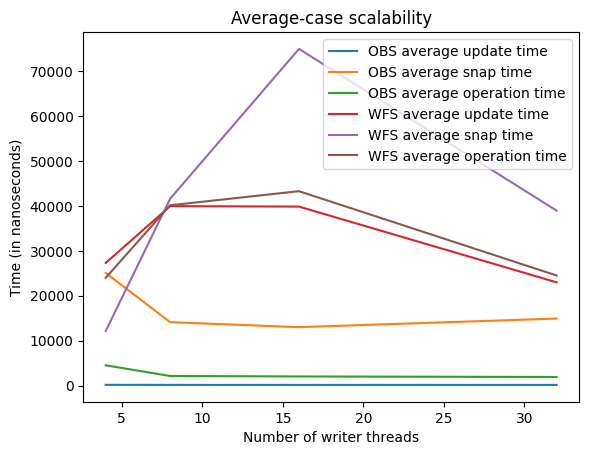

In [49]:
# Plot average case
threads = [4, 8, 16, 32]
plt.plot(threads, obs_mean_vary_threads[:, 0], label = "OBS average update time")
plt.plot(threads, obs_mean_vary_threads[:, 1], label = "OBS average snap time")
plt.plot(threads, obs_mean_vary_threads[:, 2], label = "OBS average operation time")
plt.plot(threads, wfs_mean_vary_threads[:, 0], label = "WFS average update time")
plt.plot(threads, wfs_mean_vary_threads[:, 1], label = "WFS average snap time")
plt.plot(threads, wfs_mean_vary_threads[:, 2], label = "WFS average operation time")
plt.xlabel("Number of writer threads")
plt.ylabel("Time (in nanoseconds)")
plt.title("Average-case scalability")
plt.legend()
plt.show()

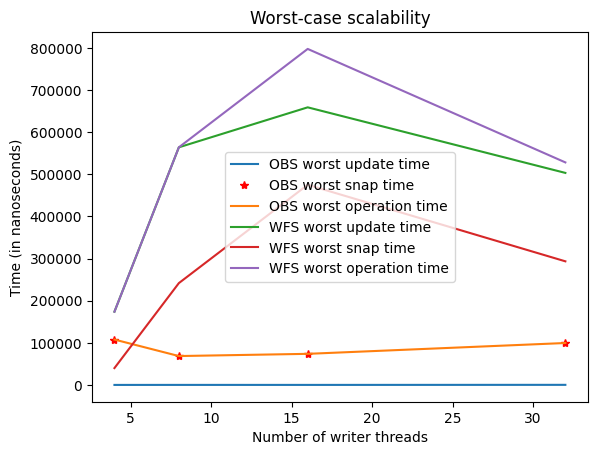

In [50]:
# Plot worst case
threads = [4, 8, 16, 32]
plt.plot(threads, obs_mean_vary_threads[:, 3], label = "OBS worst update time")
plt.plot(threads, obs_mean_vary_threads[:, 4], 'r*' ,label = "OBS worst snap time")
plt.plot(threads, obs_mean_vary_threads[:, 5], label = "OBS worst operation time")
plt.plot(threads, wfs_mean_vary_threads[:, 3], label = "WFS worst update time")
plt.plot(threads, wfs_mean_vary_threads[:, 4], label = "WFS worst snap time")
plt.plot(threads, wfs_mean_vary_threads[:, 5], label = "WFS worst operation time")
plt.xlabel("Number of writer threads")
plt.ylabel("Time (in nanoseconds)")
plt.title("Worst-case scalability")
plt.legend()
plt.show()

In [44]:
def vary_ratio(executable_file):
    li = []
    mean_li = []
    M = 20
    muw = 0.5
    mus = 0.5
    k = 5
    ns = 4
    for r in [1, 2, 4, 6, 8, 10]:
        nw = int(r * ns)
        # Open file inp-params.txt
        f = open("inp-params.txt", "w")
        f.write(f"{nw} {ns} {M} {muw} {mus} {k}")
        f.close()
        li_temp = []
        for _ in range(5):
            # Run executable 5 times
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            # Read output file
            f1 = open("1.txt", "r")
            a = [float(x) for x in f1.readline().split()]
            f1.close()
            li_temp.append(a)
        li.append(li_temp)
        # Take mean of five executions
        mean_li_temp = np.mean(li_temp, axis=0)
        mean_li.append(mean_li_temp)
        # print(li)
    return np.array(li), np.array(mean_li)

In [45]:
obs_vary_ratio, obs_mean_vary_ratio = vary_ratio("OBS")

In [46]:
wfs_vary_ratio, wfs_mean_vary_ratio = vary_ratio("WFS")

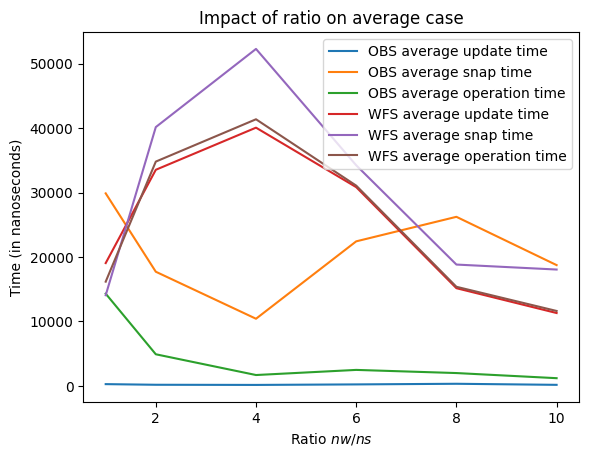

In [59]:
# Plot average case
ratios = [1, 2, 4, 6, 8, 10]
plt.plot(ratios, obs_mean_vary_ratio[:, 0], label = "OBS average update time")
plt.plot(ratios, obs_mean_vary_ratio[:, 1], label = "OBS average snap time")
plt.plot(ratios, obs_mean_vary_ratio[:, 2], label = "OBS average operation time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 0], label = "WFS average update time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 1], label = "WFS average snap time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 2], label = "WFS average operation time")
plt.xlabel("Ratio $nw/ns$")
plt.ylabel("Time (in nanoseconds)")
plt.title("Impact of ratio on average case")
plt.legend()
plt.show()

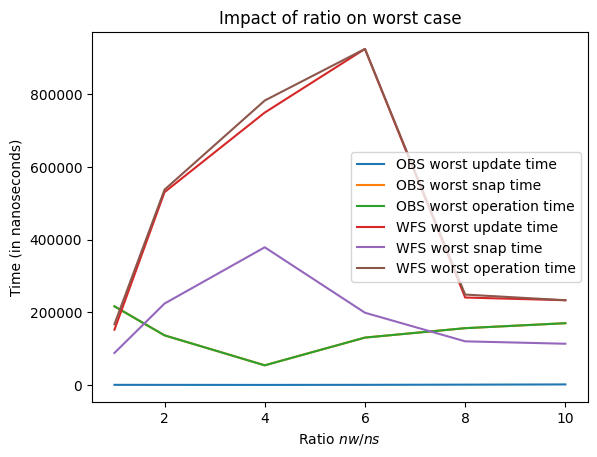

In [58]:
# Plot average case
ratios = [1, 2, 4, 6, 8, 10]
plt.plot(ratios, obs_mean_vary_ratio[:, 3], label = "OBS worst update time")
plt.plot(ratios, obs_mean_vary_ratio[:, 4], label = "OBS worst snap time")
plt.plot(ratios, obs_mean_vary_ratio[:, 5], label = "OBS worst operation time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 3], label = "WFS worst update time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 4], label = "WFS worst snap time")
plt.plot(ratios, wfs_mean_vary_ratio[:, 5], label = "WFS worst operation time")
plt.xlabel("Ratio $nw/ns$")
plt.ylabel("Time (in nanoseconds)")
plt.title("Impact of ratio on worst case")
plt.legend()
plt.show()

In [63]:
f = open("all_data.txt", "w")
f.write("obs_vary_threads\n")
f.write(str(obs_vary_threads))
f.write("\nwfs_vary_threads\n")
f.write(str(wfs_vary_threads))
f.write("\nobs_vary_ratio\n")
f.write(str(obs_vary_ratio))
f.write("\nwfs_vary_ratio\n")
f.write(str(wfs_vary_ratio))
f.close()

In [66]:
import csv
with open('obs_vary_thread.csv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(['obs_vary_threads'])
    for row in obs_vary_threads:
        for item in row:
            writer.writerow(item)
        writer.writerow([])

In [67]:
with open('obs_vary_ratio.csv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(['obs_vary_ratio'])
    for row in obs_vary_ratio:
        for item in row:
            writer.writerow(item)
        writer.writerow([])

In [68]:
with open('wfs_vary_threads.csv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(['wfs_vary_threads'])
    for row in wfs_vary_threads:
        for item in row:
            writer.writerow(item)
        writer.writerow([])

In [69]:
with open('wfs_vary_ratio.csv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(['wfs_vary_ratio'])
    for row in wfs_vary_ratio:
        for item in row:
            writer.writerow(item)
        writer.writerow([])